<a href="https://colab.research.google.com/github/JAGANPS/self-driving-car-using-deep-learning/blob/master/traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [164]:
!ls 

german-traffic-signs  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd
import cv2

In [0]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline

In [0]:
np.random.seed(0)


In [168]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
print(type(train_data))
X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

<class 'dict'>


In [169]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of the images is not equal to the number of labels"
assert(X_val.shape[0]==y_val.shape[0]),"The number of the images is not equal to the number of labels"
assert(X_test.shape[0]==y_test.shape[0]),"The number of the images is not equal to the number of labels"
assert(X_train.shape[1:] ==  (32,32,3)),"the dimension of the images are not 32*32*3"
assert(X_val.shape[1:] ==  (32,32,3)),"the dimension of the images are not 32*32*3"
assert(X_test.shape[1:] ==  (32,32,3)),"the dimension of the images are not 32*32*3"


In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')


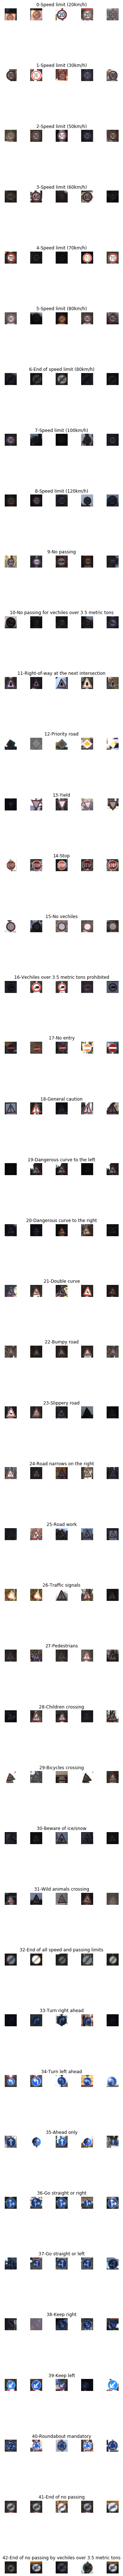

In [172]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 100))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row["SignName"])
            num_of_samples.append(len(x_selected))



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


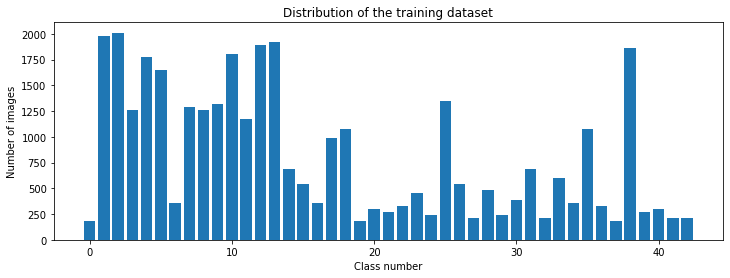

In [173]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


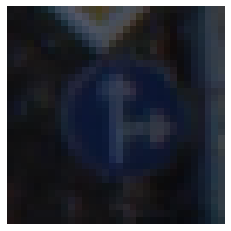

In [174]:
import cv2
plt.imshow(X_train[1000])
print(X_train[1000].shape)
plt.axis("off")
print(y_train[1000])

(32, 32)


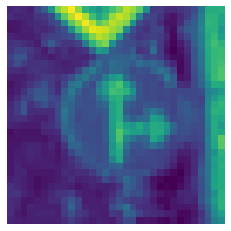

In [175]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)


(32, 32)


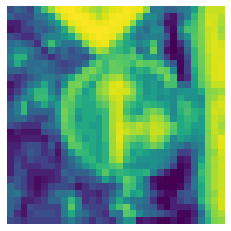

In [176]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img
img=equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img
X_train=np.array(list(map(preprocess ,X_train)))
X_val=np.array(list(map(preprocess ,X_val)))
X_test=np.array(list(map(preprocess ,X_test)))

(34799, 32, 32)


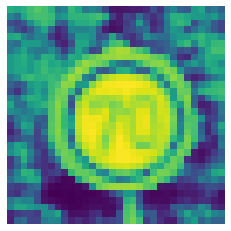

In [178]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train=X_train.reshape(34799, 32, 32,1)
X_test=X_test.reshape(12630, 32, 32,1)
X_val=X_val.reshape(4410, 32, 32,1)

(15, 32, 32, 1)


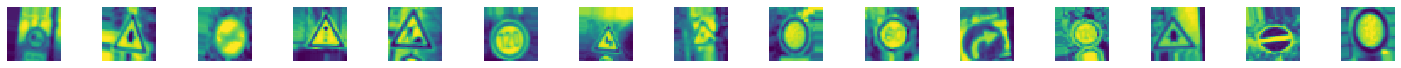

In [180]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [181]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu' ))
  model.add(Conv2D(60,(5,5),activation='relu' ))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation='relu' ))
  model.add(Conv2D(30,(3,3),activation='relu' ))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [184]:
model=modified_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 30)         

In [185]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 37s 19ms/step - loss: 1.2291 - acc: 0.6365 - val_loss: 0.1843 - val_acc: 0.9442
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.3796 - acc: 0.8799 - val_loss: 0.0892 - val_acc: 0.9741
Epoch 3/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.2616 - acc: 0.9177 - val_loss: 0.0957 - val_acc: 0.9667
Epoch 4/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.2069 - acc: 0.9353 - val_loss: 0.0647 - val_acc: 0.9812
Epoch 5/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1828 - acc: 0.9429 - val_loss: 0.0407 - val_acc: 0.9882
Epoch 6/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.1619 - acc: 0.9500 - val_loss: 0.0257 - val_acc: 0.9930
Epoch 7/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.1540 - acc: 0.9525 - val_loss: 0.0344 - val_acc: 0.9918
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epoch')

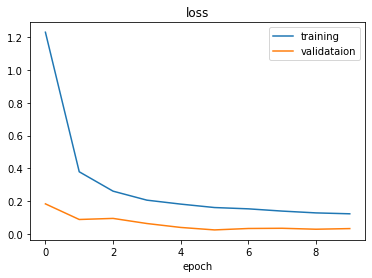

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validataion'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

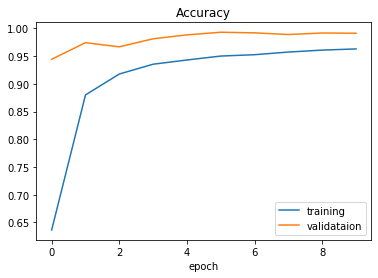

In [193]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validataion'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [194]:
score=model.evaluate(X_test,y_test,verbose=0)

print("test score:",score[0])
print("test accuracy:",score[1])

test score: 0.07650772101197521
test accuracy: 0.9771971496153897


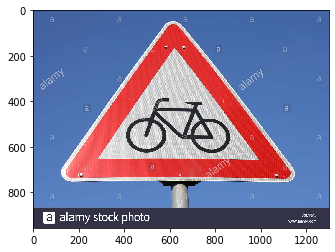

In [204]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 


(32, 32)


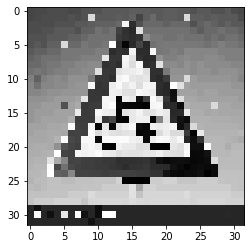

In [205]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image


In [206]:
print("predicted sign: "+ str(model.predict_classes(img)))


predicted sign: [29]
